In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [4]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0_feature_L2norm,layer_dict.conv1_feature_L2norm,layer_dict.conv2_feature_L2norm,layer_dict.conv3_feature_L2norm,layer_dict.linear_feature_L2norm,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
num_step,,,,,,,,,,,,,,,,,,,,,
0,1436.656406,409.370072,129.502628,35.705457,2.619696,0.000141,26.160859,1.278488,0.003547,187.330685,...,633.465278,14.011723,28.954337,-1.201917e-09,0.078948,0.041733,0.000198,0.170602,0.087411,0.016381
1,1436.531875,409.386683,129.604340,35.695761,4.649887,-0.000291,28.510685,1.417546,0.003547,187.330797,...,634.539736,14.014322,28.705510,-8.953358e-10,0.074060,0.039072,0.000198,0.170720,0.087472,0.016212
2,1437.044438,409.292230,128.425268,37.532661,8.783734,-0.000439,26.744827,1.263069,0.003547,187.330695,...,638.029289,14.029288,28.501431,2.917161e-10,0.076060,0.039902,0.000198,0.170892,0.087563,0.016002
3,1437.459550,409.222549,126.896732,40.609524,14.148907,-0.000667,20.479596,0.956011,0.003547,187.330612,...,643.053181,14.055282,28.286266,1.200108e-09,0.048348,0.025432,0.000198,0.171045,0.087644,0.015833
4,1437.828067,409.166164,125.281900,46.084599,22.285612,-0.000503,10.831660,0.510521,0.003549,187.330568,...,648.923919,14.090997,28.139358,8.710649e-10,0.020866,0.011115,0.000198,0.171219,0.087736,0.015713


<Figure size 800x600 with 0 Axes>

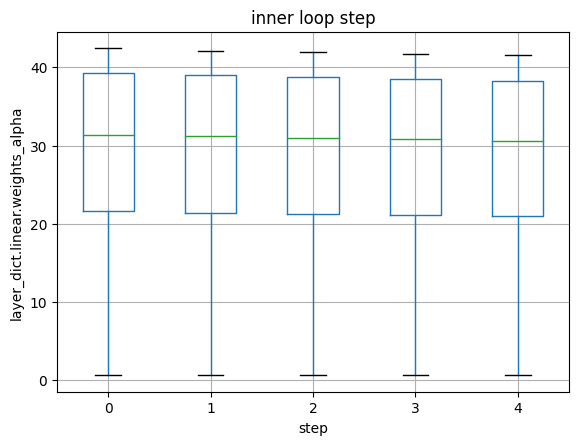

In [9]:
plt.figure(figsize=(8, 6))
norm_info_train.boxplot(column='layer_dict.linear.weights_alpha', by='num_step')
plt.title('inner loop step')
plt.xlabel('step')
plt.ylabel('layer_dict.linear.weights_alpha')
plt.suptitle('')  # 기본 제목 제거
plt.show()

<Figure size 800x600 with 0 Axes>

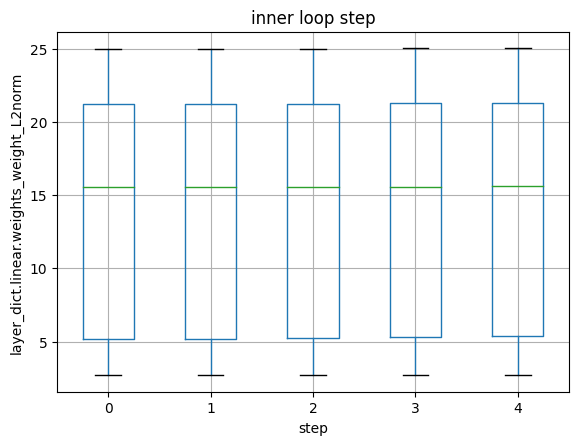

In [6]:
plt.figure(figsize=(8, 6))
norm_info_train.boxplot(column='layer_dict.linear.weights_weight_L2norm', by='num_step')
plt.title('inner loop step')
plt.xlabel('step')
plt.ylabel('layer_dict.linear.weights_weight_L2norm')
plt.suptitle('')  # 기본 제목 제거
plt.show()

<Figure size 800x600 with 0 Axes>

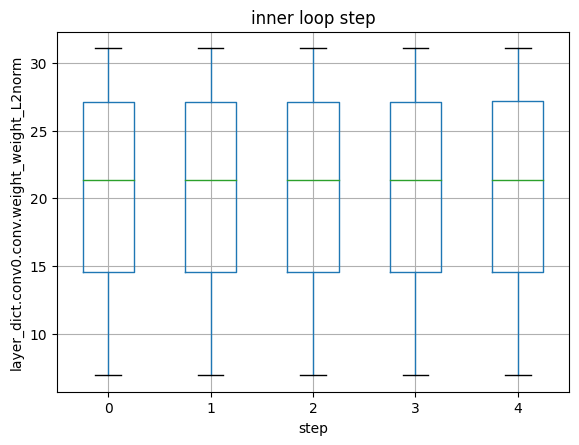

In [7]:
plt.figure(figsize=(8, 6))
norm_info_train.boxplot(column='layer_dict.conv3.conv.weight_weight_L2norm', by='num_step')
plt.title('inner loop step')
plt.xlabel('step')
plt.ylabel('layer_dict.conv0.conv.weight_weight_L2norm')
plt.suptitle('')  # 기본 제목 제거
plt.show()